In [40]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
df = pd.read_csv('/content/news.csv')
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
df.head()

Dataset Shape: (6335, 4)

Columns: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [42]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
df[['text','clean_text']].head()

,text,clean_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,us secretary state john f kerry said monday st...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",— kaydee king kaydeeking november lesson tonig...
4,It's primary day in New York and front-runners...,primary day new york frontrunners hillary clin...


In [44]:
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),      # Unigrams + Bigrams
    max_features=10000,     # Increased features
    min_df=5)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

print("Feature Matrix Shape:", X.shape)
print("Feature Shape:", X.shape)

Feature Matrix Shape: (6335, 10000)
Feature Shape: (6335, 10000)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (5068, 10000)
Testing Shape: (1267, 10000)


In [46]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model Training Completed")

Model Training Completed


In [47]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9060773480662984

Classification Report:

              precision    recall  f1-score   support

        FAKE       0.89      0.92      0.91       628
        REAL       0.92      0.89      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



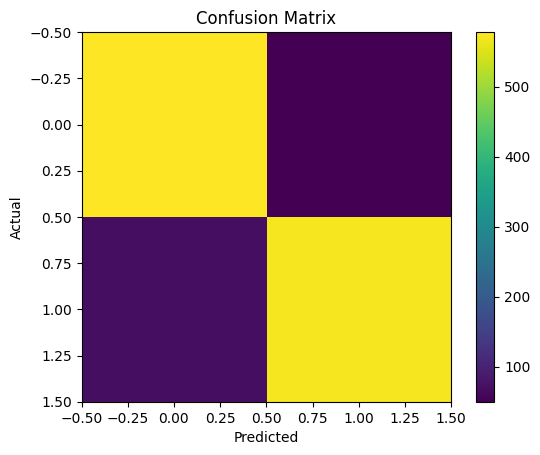

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

------------------------------------------------------------
                     CONCLUSION
------------------------------------------------------------
 1  :  Successfully implemented a text classification model using Multinomial Naive Bayes algorithm.                                      

 2 : Performed text preprocessing including lowercase conversion, removal of punctuation, numbers, and stopwords.                         

 3 : Converted textual data into numerical format using TF-IDF   vectorization technique.                                                 

 4 : Improved feature extraction using unigrams and bigrams (ngram_range = (1,2)) with max_features = 10000 and min_df = 5.         

 5 : Split the dataset into 80% training and 20% testing data    to evaluate model performance.                                           

 6 : Achieved approximately 90% accuracy, indicating strong      classification performance.                                              

 7 : Observed that Naive Bayes assumes word independence,        which limits deep contextual understanding.                              

 8 :  Concluded that TF-IDF with Naive Bayes provides an efficient and effective baseline model for text classification.                   |
